In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

from scipy.stats import chisquare

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [2]:
t_train = pd.read_csv("Traveldata_train.csv")
s_train = pd.read_csv("Surveydata_train.csv")
t_test = pd.read_csv("Traveldata_test.csv")
s_test = pd.read_csv("Surveydata_test.csv")
t_train.head(5)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [3]:
s_train.head(5)

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [4]:
l=[t_train, s_train]
for i in l:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94

In [5]:
for i in l:
    print(i.nunique())

ID                        94379
Gender                        2
CustomerType                  2
Age                          75
TypeTravel                    2
Travel_Class                  2
Travel_Distance            5210
DepartureDelay_in_Mins      437
ArrivalDelay_in_Mins        434
dtype: int64
ID                         94379
Overall_Experience             2
Seat_comfort                   6
Seat_Class                     2
Arrival_time_convenient        6
Catering                       6
Platform_location              6
Onboardwifi_service            6
Onboard_entertainment          6
Online_support                 6
Onlinebooking_Ease             6
Onboard_service                6
Leg_room                       6
Baggage_handling               5
Checkin_service                6
Cleanliness                    6
Online_boarding                6
dtype: int64


In [6]:
#Merging Training Data (t+s)
df_train = pd.merge(t_train, s_train, how = 'left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [7]:
#df_train.to_csv("df_train.csv", index = True)
#MERGE Test data (t+s)
df_test = pd.merge(t_test,s_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape

(35602, 23)

In [8]:
#df_test.to_csv("df_test.csv", index = True)
df_train.head(5)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   CustomerType             85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   TypeTravel               85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   DepartureDelay_in_Mins   94322 non-null  float64
 7   ArrivalDelay_in_Mins     94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_time_convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_location        94349 non-null  object 
 14  Onboardwifi_

In [10]:
df_train.describe()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
count,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,39.419647,1978.888185,14.647092,15.005222,0.546658
std,15.116632,1027.961019,38.138781,38.439409,0.497821
min,7.000000,50.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,51.000000,2538.000000,12.000000,13.000000,1.000000
max,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [ ]:
# EDA of df_train

In [13]:
# Column departure and arrival are correlated -> impute missing values on both columns
df_train.DepartureDelay_in_Mins.fillna(df_train.ArrivalDelay_in_Mins, inplace=True)
df_train.ArrivalDelay_in_Mins.fillna(df_train.DepartureDelay_in_Mins, inplace=True)
#Remove Missing Rows, from Columns with Little number of Missing Values
#Delete Rows with Missing Values (containing in columns)
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'DepartureDelay_in_Mins',
                                               'ArrivalDelay_in_Mins', 'Seat_comfort', 'Platform_location',
                                               'Onboardwifi_service', 'Onboard_entertainment', 'Online_support',
                                               'Onlinebooking_Ease', 'Leg_room', 'Baggage_handling',
                                               'Checkin_service', 'Cleanliness', 'Online_boarding'])
target = ['Overall_Experience']
#Creating a list of numerical columns
num_col = ['Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']
#All columns
all_col = list(df_train.columns)
all_col

['Gender',
 'CustomerType',
 'Age',
 'TypeTravel',
 'Travel_Class',
 'Travel_Distance',
 'DepartureDelay_in_Mins',
 'ArrivalDelay_in_Mins',
 'Overall_Experience',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [14]:
#Creating list of categorical columns
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'CustomerType',
 'TypeTravel',
 'Travel_Class',
 'Seat_comfort',
 'Seat_Class',
 'Arrival_time_convenient',
 'Catering',
 'Platform_location',
 'Onboardwifi_service',
 'Onboard_entertainment',
 'Online_support',
 'Onlinebooking_Ease',
 'Onboard_service',
 'Leg_room',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

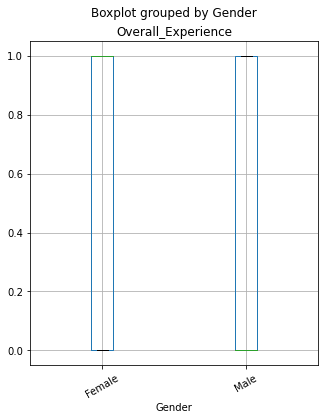

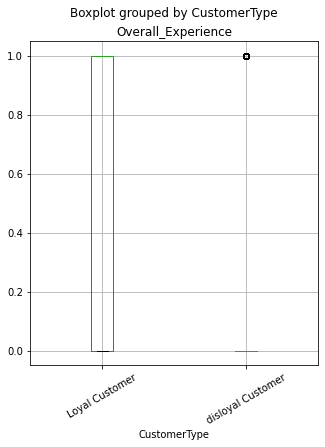

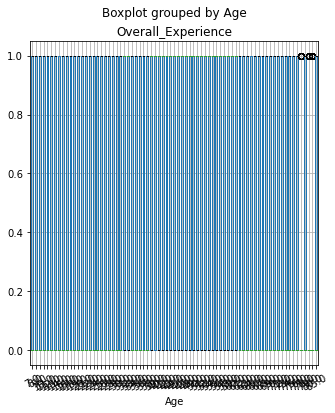

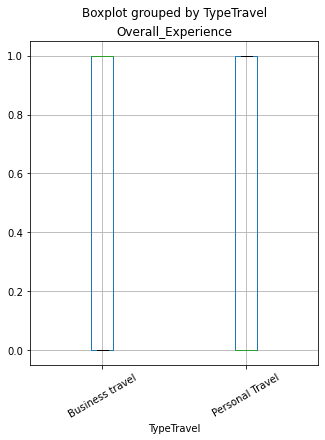

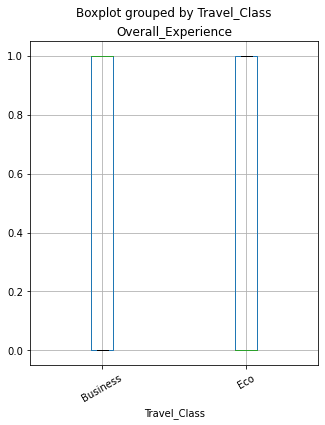

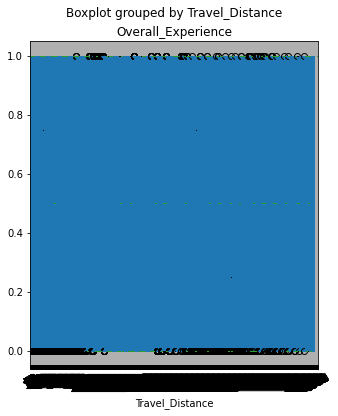

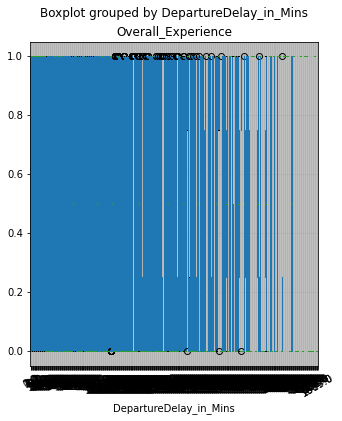

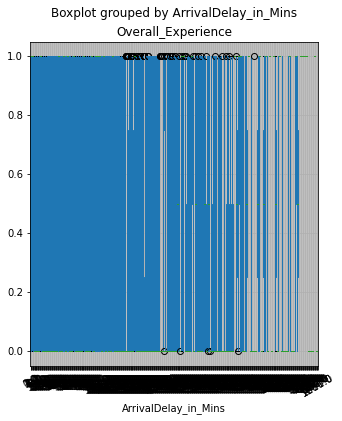

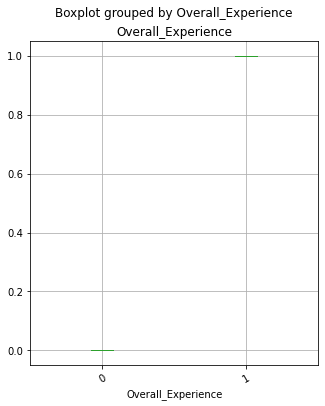

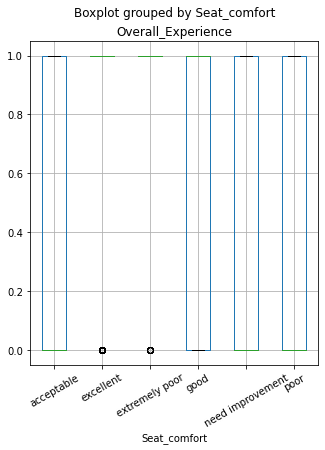

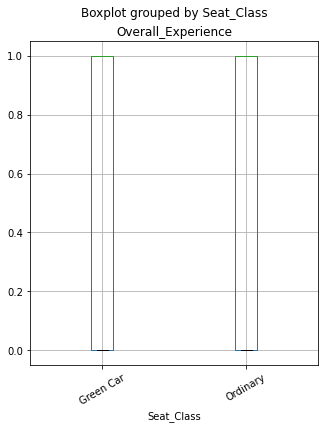

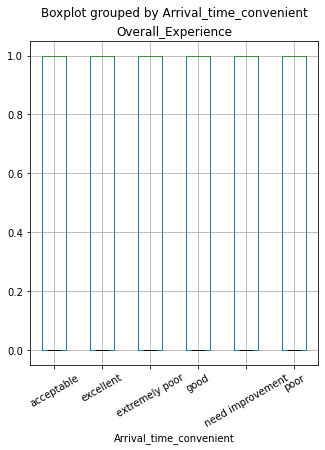

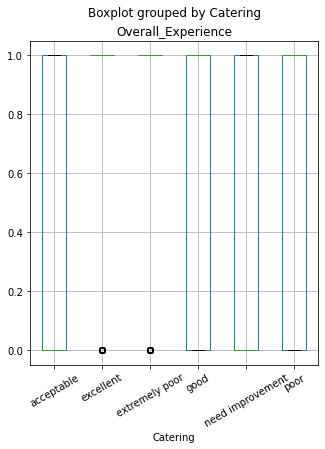

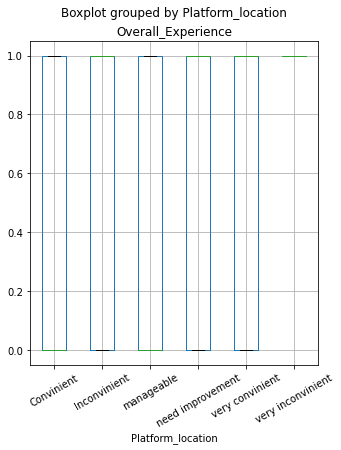

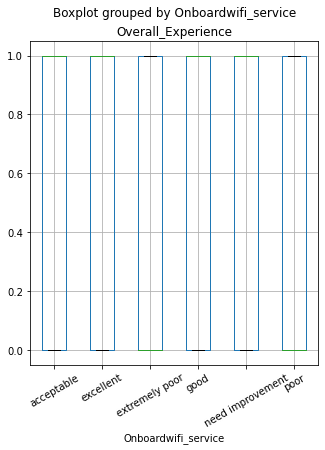

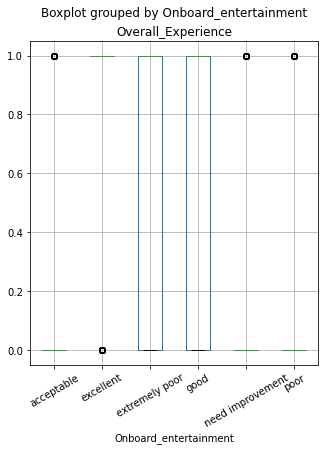

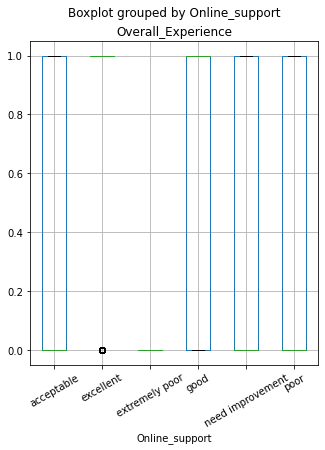

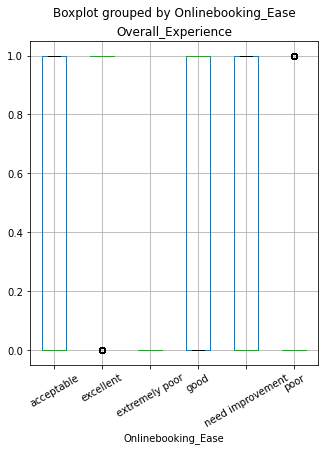

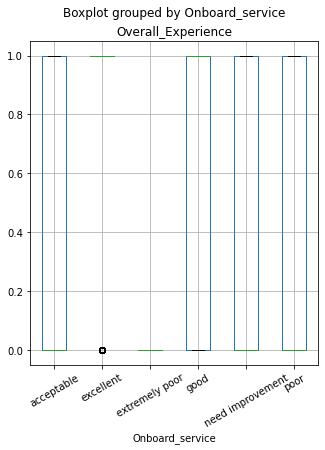

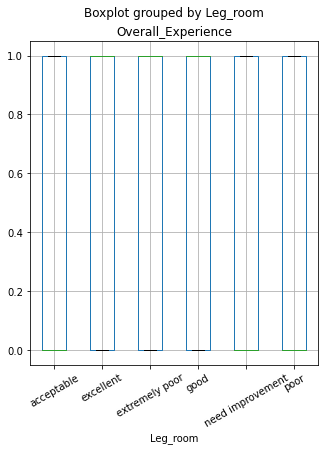

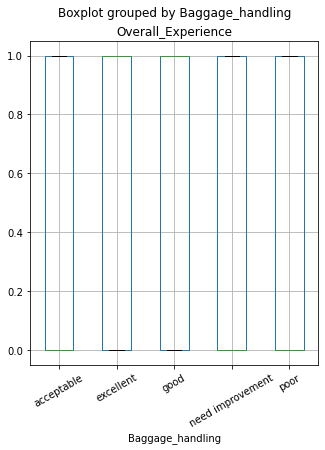

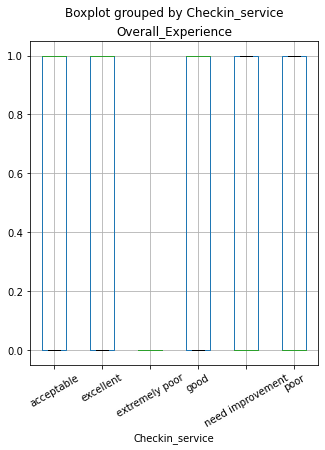

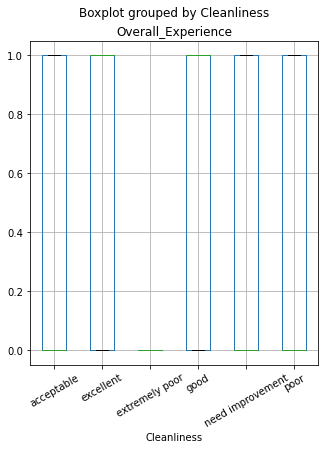

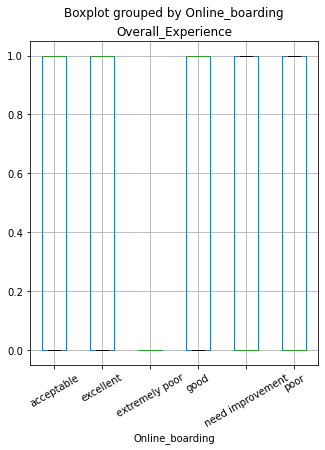

In [15]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


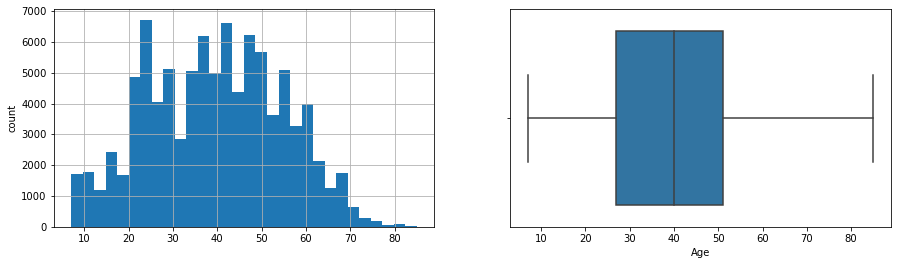

Travel_Distance
Skew : 0.47


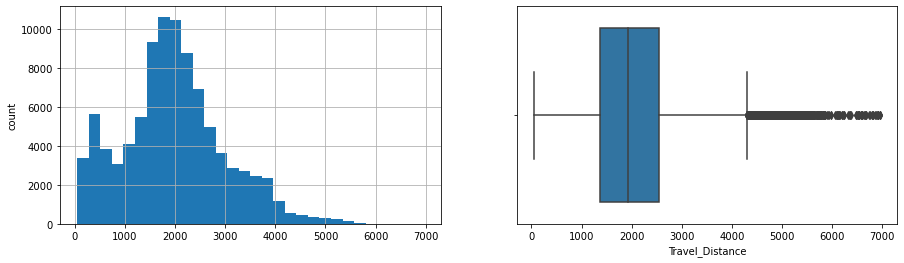

DepartureDelay_in_Mins
Skew : 6.41


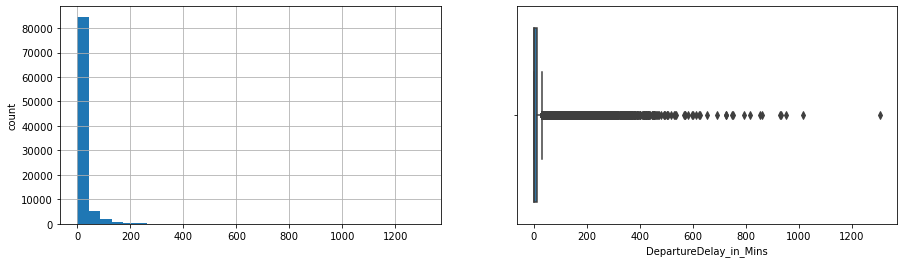

ArrivalDelay_in_Mins
Skew : 6.24


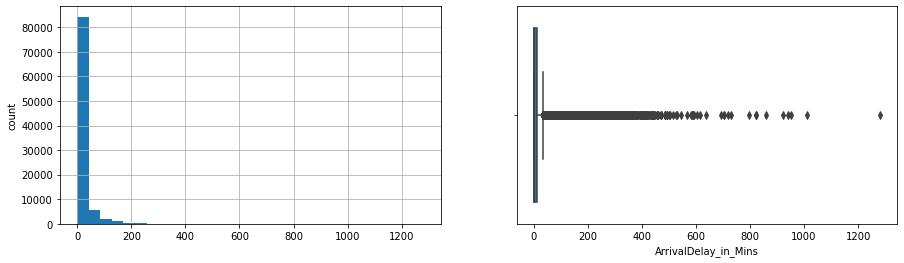

In [16]:
# Uncomment and complete the code by filling the blanks 
data = df_train

for col in num_col:   #list(df_train.columns):
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

In [17]:
#Preproceccing the Data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93995 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   93995 non-null  object 
 1   CustomerType             85147 non-null  object 
 2   Age                      93995 non-null  float64
 3   TypeTravel               84836 non-null  object 
 4   Travel_Class             93995 non-null  object 
 5   Travel_Distance          93995 non-null  int64  
 6   DepartureDelay_in_Mins   93995 non-null  float64
 7   ArrivalDelay_in_Mins     93995 non-null  float64
 8   Overall_Experience       93995 non-null  int64  
 9   Seat_comfort             93995 non-null  object 
 10  Seat_Class               93995 non-null  object 
 11  Arrival_time_convenient  85175 non-null  object 
 12  Catering                 85300 non-null  object 
 13  Platform_location        93995 non-null  object 
 14  Onboardwifi_

In [18]:
#Remove Outliers
#Delete outliers by delay
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)
    #outliers_removed = [x for x in data if x >= lower and x <= upper]
    #print('Non-outlier observations: %d' % len(outliers_removed))



#df_train.drop(df_train[df_train['Departure_Delay_in_Mins'] >= 950].index, inplace = True)
#df_train.drop(df_train[df_train['Travel_Distance'] >= 6900].index, inplace = True)
#print(df_train[df_train['Departure_Delay_in_Mins'] >= 970].index)


print(df_train.shape)

(93995, 24)
i== Age
Mean, Std: 39.41930953774137 15.117624442600505
Lower, Upper: -5.933563790060148 84.77218286554289
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.7277312533918 1027.9997131741425
Lower, Upper: -1105.2714082690356 5062.726870775819
Identified outliers: 618
i== DepartureDelay_in_Mins
Mean, Std: 14.370633789993466 36.877085616177375
Lower, Upper: -96.26062305853867 125.0018906385256
Identified outliers: 1942
i== ArrivalDelay_in_Mins
Mean, Std: 10.857291313431856 22.000458489232507
Lower, Upper: -55.14408415426567 76.85866678112939
Identified outliers: 2778
(88639, 24)


In [19]:
#1. Combine df_train and df_test - to transform together
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)
ind_train = df_train.index
ind_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.tail()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,need improvement,Green Car,...,acceptable,need improvement,acceptable,acceptable,good,excellent,good,acceptable,good,acceptable
99935599,Female,Loyal Customer,53.0,Business travel,Business,1772,0.0,0.0,need improvement,Ordinary,...,acceptable,excellent,excellent,good,good,good,good,acceptable,good,good
99935600,Male,disloyal Customer,22.0,Business travel,Eco,1180,0.0,0.0,good,Green Car,...,need improvement,good,poor,need improvement,poor,acceptable,poor,poor,excellent,need improvement
99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,excellent,Ordinary,...,acceptable,excellent,good,excellent,excellent,excellent,excellent,acceptable,excellent,good
99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,good,Ordinary,...,poor,good,poor,poor,acceptable,good,good,need improvement,good,poor


In [65]:
#2. Insert Missing Values Between Departure - Arrival columns, as they are almost correlated
df.DepartureDelay_in_Mins.fillna(df.ArrivalDelay_in_Mins, inplace=True)
df.ArrivalDelay_in_Mins.fillna(df.DepartureDelay_in_Mins, inplace=True)
#3. Encoding Categorical Values.
df = df.replace(['excellent', 'good', 'acceptable', 'need improvement', 'poor', 'extremely poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'disloyal Customer'], [1,0])
df = df.replace(['Business travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['very convinient', 'Convinient', 'manageable', 'need improvement', 'Inconvinient', 'very inconvinient'], 
           [6, 5, 4, 3, 2, 1])

In [66]:
df.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272,0.0,5.0,3.0,1,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,2.0,0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,4.0,0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,4.0,0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.0,44.0,1.0,1,2810,0.0,0.0,3.0,0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [67]:
#3. Hot Encoding 0-1 categories
#df = pd.get_dummies(df)
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124241 entries, 98800001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   124211 non-null  float64
 1   CustomerType             112522 non-null  float64
 2   Age                      124230 non-null  float64
 3   TypeTravel               112110 non-null  float64
 4   Travel_Class             124241 non-null  int64  
 5   Travel_Distance          124241 non-null  int64  
 6   DepartureDelay_in_Mins   124212 non-null  float64
 7   ArrivalDelay_in_Mins     124212 non-null  float64
 8   Seat_comfort             124219 non-null  float64
 9   Seat_Class               124241 non-null  int64  
 10  Arrival_time_convenient  112603 non-null  float64
 11  Catering                 112660 non-null  float64
 12  Platform_location        124229 non-null  float64
 13  Onboardwifi_service      124229 non-null  float64


In [68]:
#Missing Values in df
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values
Gender,30,0.000241
CustomerType,11719,0.094325
Age,11,0.000089
TypeTravel,12131,0.097641
DepartureDelay_in_Mins,29,0.000233
ArrivalDelay_in_Mins,29,0.000233
Seat_comfort,22,0.000177
Arrival_time_convenient,11638,0.093673
Catering,11581,0.093214
Platform_location,12,0.000097


In [69]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.0    0.507532
1.0    0.492468
Name: Gender, dtype: float64
****************************************
1.0    0.817191
0.0    0.182809
Name: CustomerType, dtype: float64
****************************************
39.0    0.028520
25.0    0.026805
40.0    0.024833
41.0    0.023915
44.0    0.023907
          ...   
76.0    0.000475
74.0    0.000443
79.0    0.000394
78.0    0.000338
85.0    0.000056
Name: Age, Length: 75, dtype: float64
****************************************
1.0    0.688583
0.0    0.311417
Name: TypeTravel, dtype: float64
****************************************
0    0.522509
1    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963    0.000708
1812    0.000700
1789    0.000668
1639    0.000660
1748    0.000660
          ...   
5034    0.000008
5468    0.000008
4903    0.000008
5356    0.000008
5090    0.000008
Name: Travel_Distance, Length: 5057, dtype: float64
****************************************
0.0      0.586948
1.0      0.02945

In [70]:
#4. Impute all other missing values with *mode*.
# Step 1: define a simple imputer, which replaces missing values using the median, using SimpleImputer class
# Hint: look up the documentation for SimpleImputer
#imputer = SimpleImputer(strategy = "most_frequent")

# Step 2: impute the missing data
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index) 



In [71]:
#4a. Imputing missing values with K Nearest Neighbours.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [72]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [73]:
df

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.000000,52.0,0.333333,1.0,272.0,0.0,5.0,3.0,1.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.000000,48.0,0.000000,0.0,2200.0,9.0,0.0,2.0,0.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.000000,44.0,1.000000,1.0,780.0,13.0,18.0,4.0,0.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.000000,50.0,1.000000,1.0,1981.0,0.0,0.0,4.0,0.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.000000,44.0,1.000000,1.0,2810.0,0.0,0.0,3.0,0.0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.000000,8.0,0.000000,0.0,1334.0,0.0,0.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.000000,53.0,1.000000,1.0,1772.0,0.0,0.0,3.0,0.0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.000000,22.0,1.000000,0.0,1180.0,0.0,0.0,5.0,1.0,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0


In [74]:
#Missing Values in df
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values


In [75]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.000000    0.507441
1.000000    0.492382
0.333333    0.000105
0.666667    0.000072
Name: Gender, dtype: float64
****************************************
1.000000    0.799406
0.000000    0.168978
0.666667    0.020943
0.333333    0.010673
Name: CustomerType, dtype: float64
****************************************
39.000000    0.028517
25.000000    0.026811
40.000000    0.024831
44.000000    0.023913
41.000000    0.023913
               ...   
39.333333    0.000008
20.333333    0.000008
47.333333    0.000008
51.333333    0.000008
40.666667    0.000008
Name: Age, Length: 81, dtype: float64
****************************************
1.000000    0.662012
0.000000    0.287425
0.666667    0.033837
0.333333    0.016726
Name: TypeTravel, dtype: float64
****************************************
0.0    0.522509
1.0    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963.0    0.000708
1812.0    0.000700
1789.0    0.000668
1639.0    0.000660
1748.0    0.000660
    

In [76]:
df = df.round(decimals = 0)
df = df.astype(int)

In [77]:
df.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,0,5,3,1,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,9,0,2,0,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,13,18,4,0,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,0,4,0,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,0,3,0,...,5,6,5,4,4,5,4,4,4,4


In [78]:
#.5 Keep ONLY NEEDED FEATURES in df.
df = df.drop(['DepartureDelay_in_Mins'], axis=1)
#df = df.drop(['Seat_Comfort', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service','Onboard_Entertainment',
#              'Online_Support', 'Arrival_Time_Convenient','Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
#              'CheckIn_Service', 'Cleanliness', 'Online_Boarding'], axis=1)
#df.shape
#6.Featire Engineering. Add extra features.
#df["Total_Onboarding"] =  df['Baggage_Handling']+df['CheckIn_Service']+df['Cleanliness'] #''' df['Legroom']+ '''
#df["Total_Online"] = df['Online_Support'] +df['Ease_of_Online_Booking']+df['Online_Boarding']
#df["Total_On_the_Way"] = df['Onboard_Service']+df['Onboard_Entertainment']+df['Onboard_Wifi_Service']+df['Seat_Comfort']
df

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,5,3,1,6,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,0,2,0,6,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,18,4,0,3,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,4,0,4,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,3,0,3,...,5,6,5,4,4,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1,1,8,0,0,1334,0,3,1,6,...,4,3,4,4,5,6,5,4,5,4
99935599,0,1,53,1,1,1772,0,3,0,3,...,4,6,6,5,5,5,5,4,5,5
99935600,1,0,22,1,0,1180,0,5,1,1,...,3,5,2,3,2,4,2,2,6,3


<AxesSubplot:>

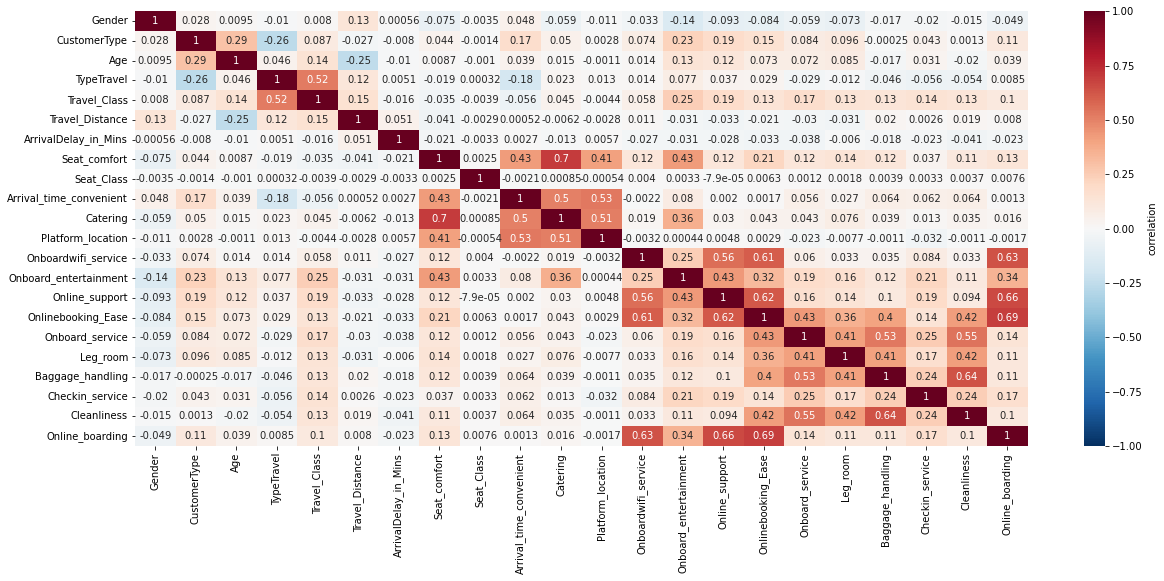

In [79]:
#Correlation for numerical_columns
df_corr = df.corr()

# Plot correlations as a heatmap

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax) 

In [80]:
#7. Divide Back to df_train and df_test
X = df.loc[ind_train]
X_test = df.loc[ind_test]

In [81]:
# Random Forest with Cross-Validation

In [82]:
y=y.astype('int')

# summarize the dataset
print(X.shape, y.shape)
print(type(X),type(y))

(88639, 22) (88639, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [83]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the model
rand_forest_classifier_cv = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.952 (0.002)


In [84]:
# make predictions using random forest for classification

# fit the model on the whole dataset
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

In [85]:
# SUBMISSION

In [86]:
X_test.shape

(35602, 22)

In [87]:
model = rand_forest_classifier_cv
#df_test = df_test.drop(['Overall_Experience'], axis=1)
#df_test.shape


In [92]:
sub = pd.DataFrame(X_test)

res = model.predict(X_test)

sub["Overall_Experience"] = res #res = model.predict(df_test)
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

ValueError: X has 23 features, but DecisionTreeClassifier is expecting 22 features as input.

In [89]:
# Sound at the end
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)